# CHIRPS

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import cftime
import pandas as pd
import rioxarray as rxr
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from src.datasources import codab, chirps

In [1]:
# run only this cell only for downloading

import pandas as pd
from tqdm.notebook import tqdm

from src.datasources import codab, chirps

# codab.download_codab()

adm = codab.load_codab(admin_level=2, aoi_only=True)

dates = pd.date_range(start="1998-01-01", end="2023-12-31", freq="D")

for date in tqdm(dates):
    chirps.download_chirps_daily(date, adm.total_bounds)

  0%|          | 0/9496 [00:00<?, ?it/s]

In [3]:
adm = codab.load_codab(admin_level=2, aoi_only=True)

<Axes: >

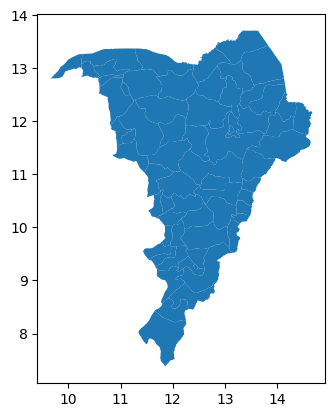

In [4]:
adm.plot()

In [5]:
chirps.process_chirps_daily()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9496/9496 [00:13<00:00, 684.37it/s]


In [7]:
chirps.calculate_raster_stats()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:31<00:00,  2.03it/s]


In [5]:
ds = chirps.load_chirps_daily()

<Axes: title={'center': 'T = 1998-01-11T12:00:00, spatial_ref = 0'}, xlabel='longitude [degree_east]', ylabel='latitude [degree_north]'>

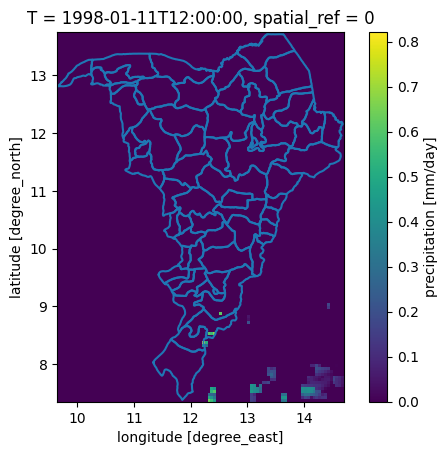

In [17]:
fig, ax = plt.subplots()
ds["prcp"].isel(T=10).plot(ax=ax)
adm.boundary.plot(ax=ax)

In [27]:
df = chirps.load_raster_stats()